In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import seaborn as sns
# 한글
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
plt.rcParams['font.family'] = 'gulim'
import warnings
warnings.filterwarnings('ignore')

In [2]:
nb_active_out = pd.read_excel('액티브_중소법인_기업외감_산업분류.xlsx')
nb_deactive_ind = pd.read_excel('휴폐업_중소법인_기업개요_산업분류.xlsx')
nb_finance_data = pd.read_csv('재무데이터.txt', encoding='cp949', sep='\t')
nb_finance_merge = pd.read_csv('재무데이터_액티브외감(0)_휴폐업(1)_머지.csv')
nb_stock = pd.read_csv('industry_top5stock_KOSPI_index_1025.csv')

In [3]:
# 산업코드별 주식 카테고리 dict
ind_to_stock_dict = {'01' : '음식료품',
'02' : '음식료품',
'03' : '음식료품',
'05': '비금속광물',
'06': '철강금속',
'07': '비금속광물',
'08': '서비스업',
'10': '음식료품',
'11': '음식료품',
'12': '기타',
'13': '섬유의복',
'14': '섬유의복',
'15': '섬유의복',
'16': '종이목재',
'17': '종이목재',
'18': '서비스업',
'19': '화학',
'20': '화학',
'21': '의약품',
'22': '화학',
'23': '비금속광물',
'24': '철강금속',
'25': '철강금속',
'26': '전기전자',
'27': '의료정밀',
'28': '전기전자',
'29': '기계',
'30': '운수장비',
'31': '운수장비',
'32': '종이목재',
'33': '기타',
'34': '기타',
'35': '전기전자',
'36': '기타',
'37': '기타',
'38': '기타',
'39': '기타',
'41': '건설업',
'42': '건설업',
'45': '운수장비',
'46': '유통업',
'47': '유통업',
'49': '유통업',
'50': '유통업',
'51': '유통업',
'52': '운수창고',
'55': '서비스업',
'56': '서비스업',
'58': '서비스업',
'59': '서비스업',
'60': '통신업',
'61': '통신업',
'62': '서비스업',
'63': '통신업',
'64': '금융업',
'65': '보험',
'66': '금융업',
'68': '기타',
'70': '기타',
'71': '서비스업',
'72': '서비스업',
'73': '서비스업',
'74': '서비스업',
'75': '서비스업',
'76': '서비스업',
'84': '기타',
'85': '서비스업',
'86': '기타',
'87': '서비스업',
'90': '서비스업',
'91': '서비스업',
'94': '기타',
'95': '서비스업',
'96': '서비스업',
'97': '기타',
'98': '기타',
'99': '기타'
}

In [5]:
ind_02_dict = {'01' : '농업',
'02' : '임업',
'03' : '어업',
'05': '석탄, 원유 및 천연가스 광업',
'06': '금속 광업',
'07': '비금속광물 광업; 연료용 제외',
'08': '광업 지원 서비스업',
'10': '식료품 제조업',
'11': '음료 제조업',
'12': '담배 제조업',
'13': '섬유제품 제조업; 의복 제외',
'14': '의복, 의복 액세서리 및 모피제품 제조업',
'15': '가죽, 가방 및 신발 제조업',
'16': '목재 및 나무제품 제조업; 가구 제외',
'17': '펄프, 종이 및 종이제품 제조업',
'18': '인쇄 및 기록매체 복제업',
'19': '코크스, 연탄 및 석유정제품 제조업',
'20': '화학 물질 및 화학제품 제조업; 의약품 제외',
'21': '의료용 물질 및 의약품 제조업',
'22': '고무 및 플라스틱제품 제조업',
'23': '비금속 광물제품 제조업',
'24': '1차 금속 제조업',
'25': '금속 가공제품 제조업; 기계 및 가구 제외',
'26': '전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업',
'27': '의료, 정밀, 광학 기기 및 시계 제조업',
'28': '전기장비 제조업',
'29': '기타 기계 및 장비 제조업',
'30': '자동차 및 트레일러 제조업',
'31': '기타 운송장비 제조업',
'32': '가구 제조업',
'33': '기타 제품 제조업',
'34': '산업용 기계 및 장비 수리업',
'35': '전기, 가스, 증기 및 공기 조절 공급업',
'36': '수도업',
'37': '하수, 폐수 및 분뇨 처리업',
'38': '폐기물 수집, 운반, 처리 및 원료 재생업',
'39': '환경 정화 및 복원업',
'41': '종합 건설업',
'42': '전문직별 공사업',
'45': '자동차 및 부품 판매업',
'46': '도매 및 상품 중개업',
'47': '소매업; 자동차 제외',
'49': '육상 운송 및 파이프라인 운송업',
'50': '수상 운송업',
'51': '항공 운송업',
'52': '창고 및 운송관련 서비스업',
'55': '숙박업',
'56': '음식점 및 주점업',
'58': '출판업',
'59': '영상․오디오 기록물 제작 및 배급업',
'60': '방송업',
'61': '우편 및 통신업',
'62': '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
'63': '정보서비스업',
'64': '금융업',
'65': '보험 및 연금업',
'66': '금융 및 보험관련 서비스업',
'68': '부동산업',
'70': '연구개발업',
'71': '전문 서비스업',
'72': '건축 기술, 엔지니어링 및 기타 과학기술 서비스업',
'73': '기타 전문, 과학 및 기술 서비스업',
'74': '사업시설 관리 및 조경 서비스업',
'75': '사업 지원 서비스업',
'76': '임대업; 부동산 제외',
'84': '공공 행정, 국방 및 사회보장 행정',
'85': '교육 서비스업',
'86': '보건업',
'87': '사회복지 서비스업',
'90': '창작, 예술 및 여가관련 서비스업',
'91': '스포츠 및 오락관련 서비스업',
'94': '협회 및 단체',
'95': '개인 및 소비용품 수리업',
'96': '기타 개인 서비스업',
'97': '가구 내 고용활동',
'98': '달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동',
'99': '국제 및 외국기관'
}

In [6]:
dict_to_ind_02 = {}
for idx, value in ind_02_dict.items():
    dict_to_ind_02[value] = idx
dict_to_ind_02

{'농업': '01',
 '임업': '02',
 '어업': '03',
 '석탄, 원유 및 천연가스 광업': '05',
 '금속 광업': '06',
 '비금속광물 광업; 연료용 제외': '07',
 '광업 지원 서비스업': '08',
 '식료품 제조업': '10',
 '음료 제조업': '11',
 '담배 제조업': '12',
 '섬유제품 제조업; 의복 제외': '13',
 '의복, 의복 액세서리 및 모피제품 제조업': '14',
 '가죽, 가방 및 신발 제조업': '15',
 '목재 및 나무제품 제조업; 가구 제외': '16',
 '펄프, 종이 및 종이제품 제조업': '17',
 '인쇄 및 기록매체 복제업': '18',
 '코크스, 연탄 및 석유정제품 제조업': '19',
 '화학 물질 및 화학제품 제조업; 의약품 제외': '20',
 '의료용 물질 및 의약품 제조업': '21',
 '고무 및 플라스틱제품 제조업': '22',
 '비금속 광물제품 제조업': '23',
 '1차 금속 제조업': '24',
 '금속 가공제품 제조업; 기계 및 가구 제외': '25',
 '전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업': '26',
 '의료, 정밀, 광학 기기 및 시계 제조업': '27',
 '전기장비 제조업': '28',
 '기타 기계 및 장비 제조업': '29',
 '자동차 및 트레일러 제조업': '30',
 '기타 운송장비 제조업': '31',
 '가구 제조업': '32',
 '기타 제품 제조업': '33',
 '산업용 기계 및 장비 수리업': '34',
 '전기, 가스, 증기 및 공기 조절 공급업': '35',
 '수도업': '36',
 '하수, 폐수 및 분뇨 처리업': '37',
 '폐기물 수집, 운반, 처리 및 원료 재생업': '38',
 '환경 정화 및 복원업': '39',
 '종합 건설업': '41',
 '전문직별 공사업': '42',
 '자동차 및 부품 판매업': '45',
 '도매 및 상품 중개업': '46',
 '소매업; 자동차 제외': '4

In [7]:
# 2산업분류 없는 부분 드랍
nb_active_out_drop = nb_active_out.dropna(subset='ind_02_cate')
nb_active_out_drop.ind_02_cate

0                          소매업; 자동차 제외
1                      가죽, 가방 및 신발 제조업
2                    육상 운송 및 파이프라인 운송업
3                       자동차 및 트레일러 제조업
4                          도매 및 상품 중개업
                     ...              
28972                             부동산업
28978                             부동산업
28979      건축 기술, 엔지니어링 및 기타 과학기술 서비스업
28980                     비금속 광물제품 제조업
28981    전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
Name: ind_02_cate, Length: 28968, dtype: object

In [8]:
# 컬럼으로 삽입
nb_active_out_drop['stock_ind'] = list(map(lambda x: ind_to_stock_dict[dict_to_ind_02[x]], nb_active_out_drop.ind_02_cate))
nb_active_out_drop['target'] = '0'
nb_active_out_drop

C:\Users\Admin\AppData\Local\Temp\ipykernel_13532\168536580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_active_out_drop['stock_ind'] = list(map(lambda x: ind_to_stock_dict[dict_to_ind_02[x]], nb_active_out_drop.ind_02_cate))
C:\Users\Admin\AppData\Local\Temp\ipykernel_13532\168536580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_active_out_drop['target'] = '0'


,Unnamed: 0,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,...,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,stock_ind,target
0,0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,...,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,도매 및 소매업,소매업; 자동차 제외,유통업,0
1,1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,...,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,제조업,"가죽, 가방 및 신발 제조업",섬유의복,0
2,2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,...,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,운수 및 창고업,육상 운송 및 파이프라인 운송업,유통업,0
3,3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,...,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,제조업,자동차 및 트레일러 제조업,운수장비,0
4,4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,...,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,도매 및 소매업,도매 및 상품 중개업,유통업,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28972,28972,3778801590,(주),비에스디파트너스,NaN,"BSD Partners Co., Ltd.",M,2,2,1,...,NaN,"부동산 개발, 공급",NaN,NaN,고세환,7.0,부동산업,부동산업,기타,0
28978,28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,...,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0,부동산업,부동산업,기타,0
28979,28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,...,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0,"전문, 과학 및 기술 서비스업","건축 기술, 엔지니어링 및 기타 과학기술 서비스업",서비스업,0
28980,28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,...,NaN,레미콘,NaN,NaN,이미성,26.0,제조업,비금속 광물제품 제조업,비금속광물,0


In [9]:
# 휴폐업 동일하게 진행
nb_deactive_ind_drop = nb_deactive_ind.dropna(subset='ind_02_cate')
nb_deactive_ind_drop['stock_ind'] = list(map(lambda x: ind_to_stock_dict[dict_to_ind_02[x]], nb_deactive_ind_drop.ind_02_cate))
nb_deactive_ind_drop['target'] = '1'
nb_deactive_ind_drop

C:\Users\Admin\AppData\Local\Temp\ipykernel_13532\1613468460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_deactive_ind_drop['stock_ind'] = list(map(lambda x: ind_to_stock_dict[dict_to_ind_02[x]], nb_deactive_ind_drop.ind_02_cate))
C:\Users\Admin\AppData\Local\Temp\ipykernel_13532\1613468460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_deactive_ind_drop['target'] = '1'


,Unnamed: 0,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,...,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,stock_ind,target
0,0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,...,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0,제조업,자동차 및 트레일러 제조업,운수장비,1
1,1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,...,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0,도매 및 소매업,도매 및 상품 중개업,유통업,1
2,2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,...,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0,도매 및 소매업,도매 및 상품 중개업,유통업,1
3,3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,...,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0,제조업,금속 가공제품 제조업; 기계 및 가구 제외,철강금속,1
4,4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,...,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0,제조업,1차 금속 제조업,철강금속,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,...,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,제조업,식료품 제조업,음식료품,1
6735,6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,...,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,제조업,식료품 제조업,음식료품,1
6736,6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,...,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,숙박 및 음식점업,음식점 및 주점업,서비스업,1
6737,6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,...,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,정보통신업,출판업,서비스업,1


In [10]:
# 재무데이터와 머지
financ_gr = nb_finance_data.groupby('사업자번호')[nb_finance_data.columns].mean()
del financ_gr['사업자번호']
financ_gr = financ_gr.reset_index()
financ_merge = pd.merge(financ_gr, nb_active_out_drop[['BIZ_NO', 'stock_ind', 'target']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge = pd.merge(financ_merge, nb_deactive_ind_drop[['BIZ_NO', 'stock_ind','target']], how='left', left_on='사업자번호',right_on='BIZ_NO')
financ_merge

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,미수금,매출원가,무형자산,재고자산,BIZ_NO_x,stock_ind_x,target_x,BIZ_NO_y,stock_ind_y,target_y
0,1018100340,20196231.0,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,...,3243.000000,NaN,NaN,NaN,1.018100e+09,기타,0,NaN,NaN,NaN
1,1018100772,20196231.0,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,...,441694.500000,5.181350e+05,NaN,NaN,1.018101e+09,서비스업,0,NaN,NaN,NaN
2,1018101126,20196231.0,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,...,902.750000,1.516039e+06,527.5,NaN,1.018101e+09,기타,0,NaN,NaN,NaN
3,1018101242,20196231.0,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,...,NaN,1.178152e+06,NaN,NaN,1.018101e+09,기타,0,NaN,NaN,NaN
4,1018103819,20196231.0,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,...,12500.000000,NaN,NaN,NaN,1.018104e+09,기타,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,20186231.0,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,...,NaN,2.736914e+06,NaN,340673.00,NaN,NaN,NaN,8.998700e+09,건설업,1
35705,8998701263,20191231.0,9.025398e+06,NaN,NaN,NaN,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.998701e+09,금융업,1
35706,8998800150,20196231.0,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,...,6738.750000,1.384895e+06,105701.5,416709.00,8.998800e+09,서비스업,0,NaN,NaN,NaN
35707,8998800427,20196231.0,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,...,321181.333333,1.542906e+07,442612.0,2826866.75,8.998800e+09,전기전자,0,NaN,NaN,NaN


In [11]:
# NaN 값 처리 및 결과 확인
financ_merge.target_x.fillna('', inplace=True)
financ_merge.target_y.fillna('', inplace=True)
financ_merge.stock_ind_x.fillna('', inplace=True)
financ_merge.stock_ind_y.fillna('', inplace=True)
financ_merge['stock_ind'] = financ_merge.stock_ind_x + financ_merge.stock_ind_y
financ_merge['target'] = financ_merge.target_x + financ_merge.target_y
print('휴폐업 / 액티브 분포 :',  financ_merge['target'].value_counts(), '\n')
print('주식 산업별 분포 :',  financ_merge['stock_ind'].value_counts(), '\n')

# 액티브 외감 / 휴폐업 아닌 정보들 drop
financ_merge = financ_merge.drop(financ_merge[financ_merge.target == ''].index)
financ_merge = financ_merge[financ_merge.columns.drop(['BIZ_NO_x', 'target_x', 'BIZ_NO_y', 'target_y', 'stock_ind_x', 'stock_ind_y','사업자번호', '결산년월'])]
financ_merge

휴폐업 / 액티브 분포 : 0    28964
1     6579
       166
Name: target, dtype: int64 

주식 산업별 분포 : 유통업      6367
서비스업     5584
기타       5418
건설업      3095
전기전자     2149
기계       1964
운수장비     1872
화학       1814
철강금속     1801
음식료품     1100
섬유의복     1042
금융업       774
비금속광물     585
운수창고      547
종이목재      530
의료정밀      475
통신업       222
의약품       198
          166
보험          6
Name: stock_ind, dtype: int64 



,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,stock_ind,target
0,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,721100.0,4.241784e+06,...,1.642500e-01,1.000000e+12,5.171175e+01,1.000000e+12,3243.000000,NaN,NaN,NaN,기타,0
1,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,-7.922319e+06,...,3.875000e-02,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,NaN,NaN,서비스업,0
2,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,1539640.0,-3.495725e+06,...,8.025000e-02,1.000000e+12,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,527.5,NaN,기타,0
3,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,450000.0,1.969219e+07,...,1.075000e-01,1.000000e+12,1.859625e+01,1.000000e+12,NaN,1.178152e+06,NaN,NaN,기타,0
4,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,500000.0,4.383956e+06,...,8.225000e-02,1.000000e+12,2.059725e+01,1.000000e+12,12500.000000,NaN,NaN,NaN,기타,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,3.678865e+05,...,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,NaN,2.736914e+06,NaN,340673.00,건설업,1
35705,9.025398e+06,NaN,NaN,NaN,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,7.018633e+04,...,3.333333e+11,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,금융업,1
35706,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,1.112781e+07,...,1.053750e+00,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,105701.5,416709.00,서비스업,0
35707,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,489500.0,1.562222e+05,...,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,442612.0,2826866.75,전기전자,0


In [12]:
# 재무 결측치 평균값으로 처리 / NaN 값 확인
for var in financ_merge.columns[:-2] :
    financ_merge[var].fillna(financ_merge[var].mean(), inplace=True)
financ_merge.isna().sum().sum()

0

In [13]:
nb_stock

,날짜,KOSPI,의약품,전기전자,비금속광물,통신업,음식료품,종이목재,서비스업,전기가스업,...,의료정밀,섬유의복,금융업,증권,운수창고,유통업,철강금속,화학,건설업,기계
0,20221025,223876,0.874488,0.850165,0.924355,0.958041,0.984664,0.911672,0.830843,0.314529,...,0.906448,0.870515,0.984715,0.891644,0.985742,0.994951,0.994117,1.000000,0.957071,0.832251
1,20221024,223616,0.907890,0.886848,0.926021,0.959202,0.985264,0.918095,0.850956,0.329147,...,0.954930,0.869880,0.996580,0.912776,1.000000,0.994162,1.000000,0.973999,0.966172,0.837083
2,20221021,221312,0.948291,0.911744,0.917451,0.970636,1.000000,0.940864,0.871057,0.332795,...,0.945277,0.883571,0.994360,0.926552,0.974168,1.000000,0.989389,0.913659,0.965492,0.880612
3,20221020,221809,0.937716,0.912120,0.897537,0.965126,0.953122,0.912375,0.838346,0.328792,...,0.929794,0.892432,0.937803,0.890288,0.945364,0.927787,0.894872,0.892555,0.937025,0.830163
4,20221019,223744,0.852633,0.858957,0.883999,0.952945,0.895890,0.894142,0.822093,0.301475,...,0.884227,0.875813,0.882920,0.847773,0.885931,0.882376,0.858261,0.863046,0.935953,0.787515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,20211029,297068,0.100878,0.127756,0.332006,0.007813,0.067170,0.037222,0.036247,0.973816,...,0.087654,0.006330,0.114434,0.091872,0.089095,0.092626,0.251684,0.052134,0.025337,0.205018
244,20211028,300955,0.070006,0.082508,0.314610,0.006470,0.027658,0.014162,0.024173,0.962447,...,0.085957,0.005141,0.096848,0.023089,0.065137,0.086292,0.210881,0.021136,0.027675,0.180205
245,20211027,302549,0.078086,0.133888,0.282890,0.006434,0.007569,0.000000,0.023387,0.938654,...,0.005301,0.000564,0.064817,0.000000,0.049900,0.089026,0.156340,0.021605,0.000000,0.144985
246,20211026,304908,0.104529,0.163362,0.316724,0.004434,0.000000,0.005758,0.023793,0.951917,...,0.024540,0.000608,0.052314,0.029820,0.008629,0.081301,0.163143,0.007651,0.011756,0.175668


In [76]:
nb_stock_rev = nb_stock.sort_values(by='날짜', ascending=True)
date_list = []
for idx in nb_stock_rev.index :
    date_list.append(str(nb_stock_rev.loc[idx, '날짜'])[-6:])
nb_stock_rev.index = date_list
nb_stock_rev

,날짜,KOSPI,의약품,전기전자,비금속광물,통신업,음식료품,종이목재,서비스업,전기가스업,...,의료정밀,섬유의복,금융업,증권,운수창고,유통업,철강금속,화학,건설업,기계
211025,20211025,302054,0.147124,0.193575,0.350187,0.008052,0.022007,0.023052,0.030148,1.000000,...,0.030108,0.001907,0.071569,0.026548,0.000000,0.070222,0.170691,0.000000,0.007472,0.097266
211026,20211026,304908,0.104529,0.163362,0.316724,0.004434,0.000000,0.005758,0.023793,0.951917,...,0.024540,0.000608,0.052314,0.029820,0.008629,0.081301,0.163143,0.007651,0.011756,0.175668
211027,20211027,302549,0.078086,0.133888,0.282890,0.006434,0.007569,0.000000,0.023387,0.938654,...,0.005301,0.000564,0.064817,0.000000,0.049900,0.089026,0.156340,0.021605,0.000000,0.144985
211028,20211028,300955,0.070006,0.082508,0.314610,0.006470,0.027658,0.014162,0.024173,0.962447,...,0.085957,0.005141,0.096848,0.023089,0.065137,0.086292,0.210881,0.021136,0.027675,0.180205
211029,20211029,297068,0.100878,0.127756,0.332006,0.007813,0.067170,0.037222,0.036247,0.973816,...,0.087654,0.006330,0.114434,0.091872,0.089095,0.092626,0.251684,0.052134,0.025337,0.205018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221019,20221019,223744,0.852633,0.858957,0.883999,0.952945,0.895890,0.894142,0.822093,0.301475,...,0.884227,0.875813,0.882920,0.847773,0.885931,0.882376,0.858261,0.863046,0.935953,0.787515
221020,20221020,221809,0.937716,0.912120,0.897537,0.965126,0.953122,0.912375,0.838346,0.328792,...,0.929794,0.892432,0.937803,0.890288,0.945364,0.927787,0.894872,0.892555,0.937025,0.830163
221021,20221021,221312,0.948291,0.911744,0.917451,0.970636,1.000000,0.940864,0.871057,0.332795,...,0.945277,0.883571,0.994360,0.926552,0.974168,1.000000,0.989389,0.913659,0.965492,0.880612
221024,20221024,223616,0.907890,0.886848,0.926021,0.959202,0.985264,0.918095,0.850956,0.329147,...,0.954930,0.869880,0.996580,0.912776,1.000000,0.994162,1.000000,0.973999,0.966172,0.837083


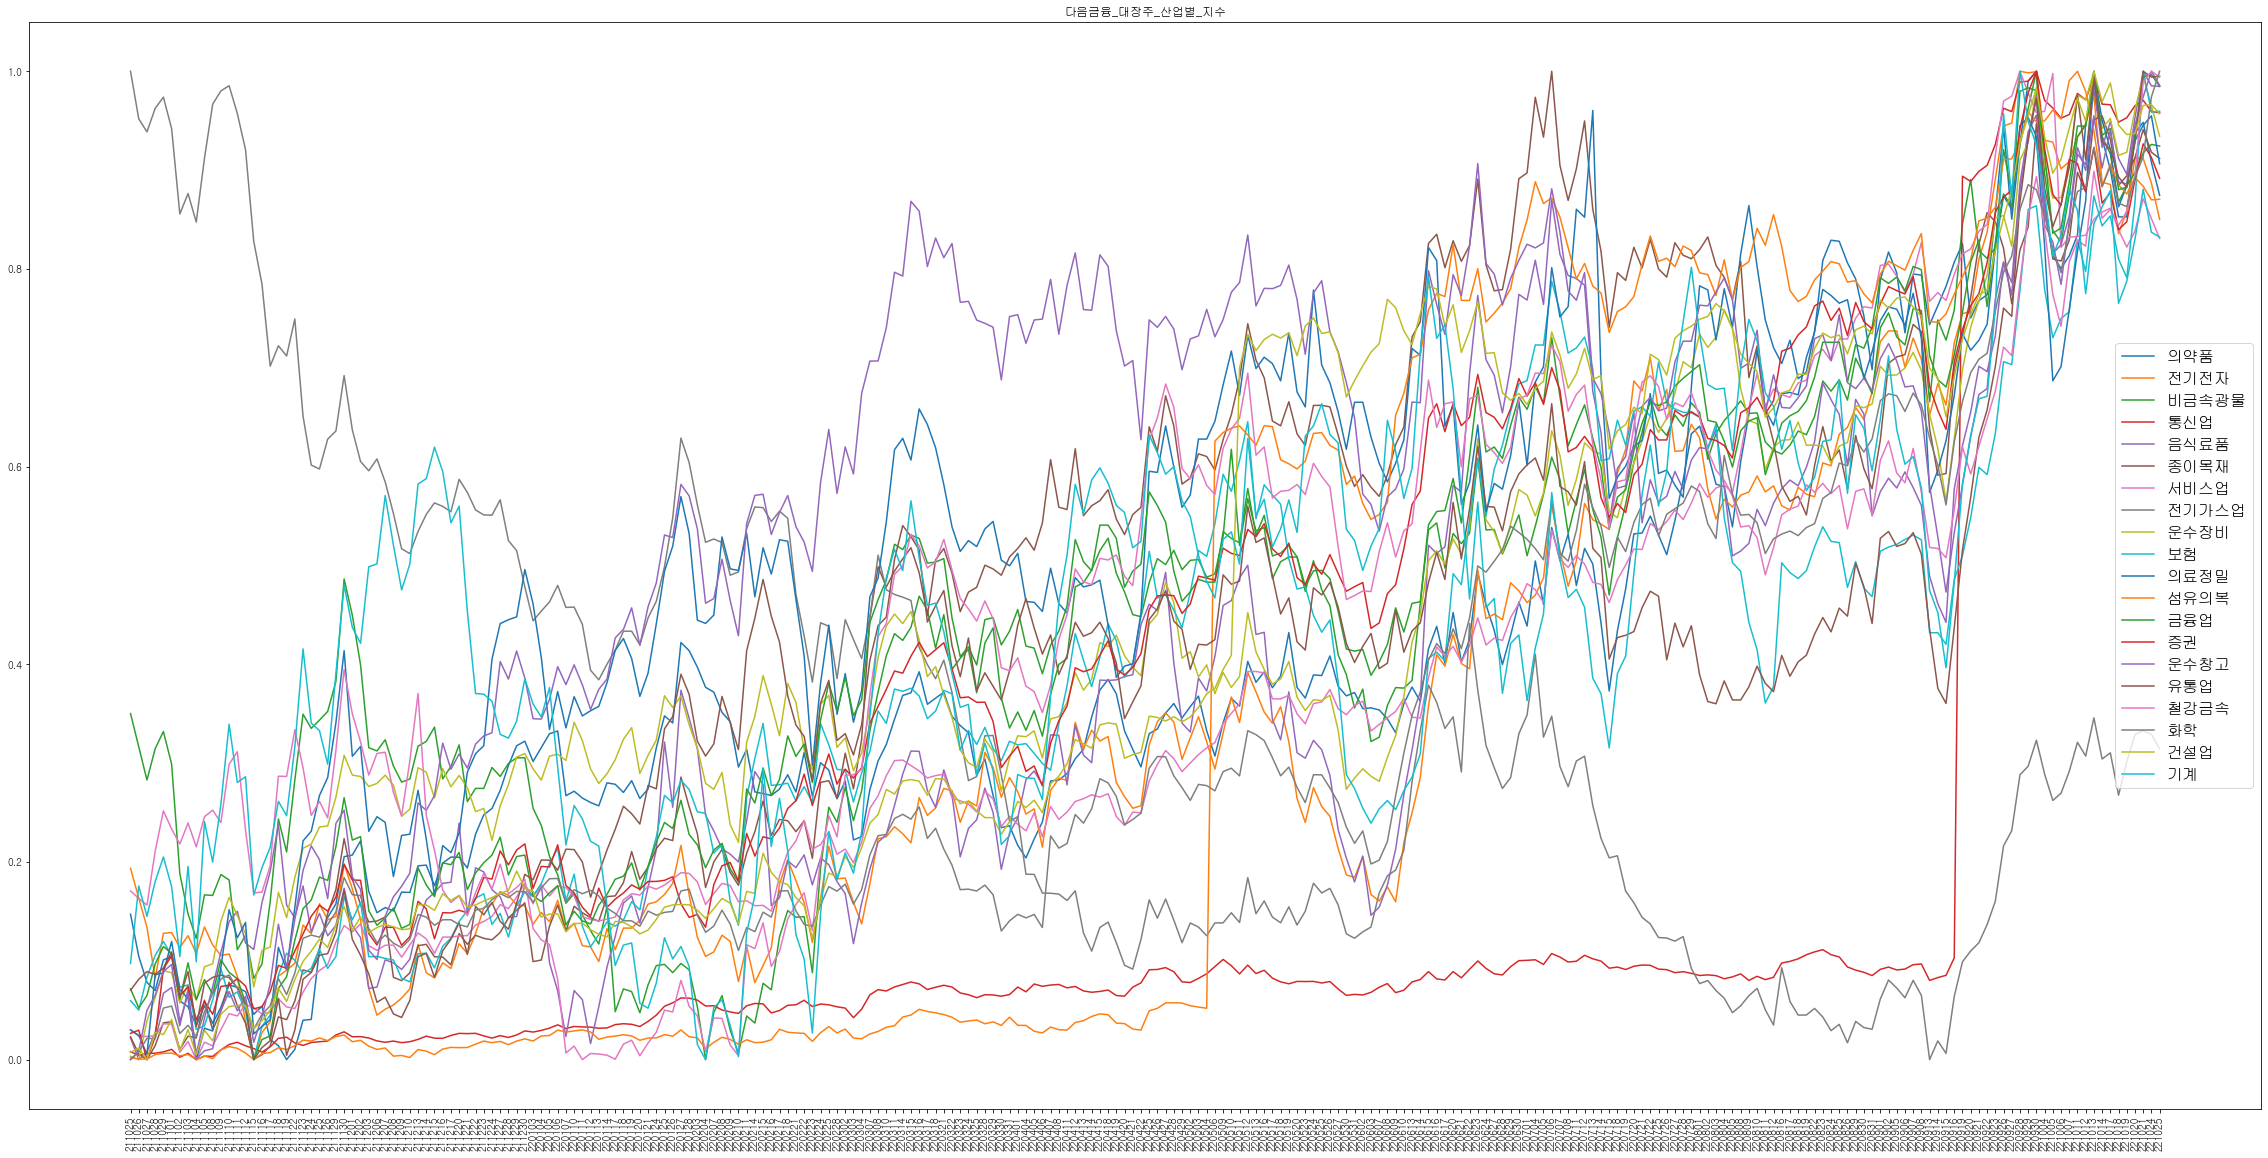

In [77]:
plt.rc('legend', fontsize=16)
plt.figure(figsize=(40, 20))
plt.title('다음금융_대장주_산업별_지수')
plt.plot(nb_stock_rev[nb_stock_rev.columns[2:]])
plt.legend(nb_stock_rev[nb_stock_rev.columns[2:]])
plt.xticks(nb_stock_rev['날짜'].index, rotation=90)
plt.show()

In [78]:
# 기타 카테고리 제거
financ_merge = financ_merge[financ_merge.stock_ind != '기타']
# 값으로 바꿔줌
financ_merge['stock_ind'] = list(map(lambda x : nb_stock.mean()[x], financ_merge['stock_ind']))
financ_merge

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,stock_ind,target
1,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,-7.922319e+06,...,3.875000e-02,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,1.178716e+06,7.132260e+06,0.373375,0
5,5.614033e+07,8.951045e+05,2.486475e+08,2.220757e+08,3.047878e+08,1.071190e+08,7.017425e+07,1.772933e+08,6032080.0,8.261184e+07,...,1.547500e-01,2.559000e+00,5.400450e+01,2.089878e+02,289356.750000,3.165286e+07,1.109375e+05,2.351630e+07,0.373375,0
6,5.466022e+06,1.633664e+06,4.158833e+06,1.126269e+06,9.624854e+06,3.607055e+06,4.205618e+06,7.812674e+06,866710.0,-1.489520e+06,...,1.633750e+00,1.000000e+12,1.414400e+01,2.765700e+01,15435.250000,1.272386e+07,2.984108e+05,7.132260e+06,0.373375,0
7,1.469212e+07,3.047592e+06,1.382678e+06,3.141415e+05,1.607480e+07,8.163105e+06,2.439804e+06,1.060291e+07,1803040.0,3.276323e+06,...,9.830000e-01,1.421000e+00,4.972250e+00,6.662750e+00,1221.666667,1.485095e+07,1.178716e+06,1.125022e+07,0.398951,0
8,1.749012e+06,1.176460e+06,1.366709e+07,1.285823e+07,1.541610e+07,2.500896e+06,6.752108e+06,9.253004e+06,300000.0,5.863095e+06,...,5.837500e-01,7.500000e+11,7.058000e+00,3.031825e+01,209370.000000,6.145081e+06,1.178716e+06,7.075300e+04,0.362622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35703,1.401428e+06,2.411760e+05,3.106282e+07,3.098555e+07,3.246425e+07,1.259251e+07,1.786342e+07,3.045592e+07,1800000.0,2.083275e+05,...,5.000000e+11,1.000000e+12,5.000000e+11,5.000000e+11,1872.500000,3.007351e+06,1.567000e+03,7.132260e+06,0.590733,0
35704,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,3.678865e+05,...,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,441186.654049,2.736914e+06,1.178716e+06,3.406730e+05,0.445615,1
35705,9.025398e+06,4.322506e+06,1.886526e+07,1.325413e+07,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,7.018633e+04,...,3.333333e+11,1.000000e+12,1.000000e+12,1.000000e+12,441186.654049,2.277169e+07,1.178716e+06,7.132260e+06,0.462050,1
35706,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,1.112781e+07,...,1.053750e+00,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,1.057015e+05,4.167090e+05,0.373375,0


In [ ]:
#  train_test_split
X_train, X_test, y_train, y_test = train_test_split(financ_merge[financ_merge.columns[:-1]], financ_merge.target,test_size=0.2, stratify=financ_merge.target, random_state=2022)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24100, 45), (6025, 45), (24100,), (6025,))

의사결정 나무 모델 정확도 :  0.91701244813278


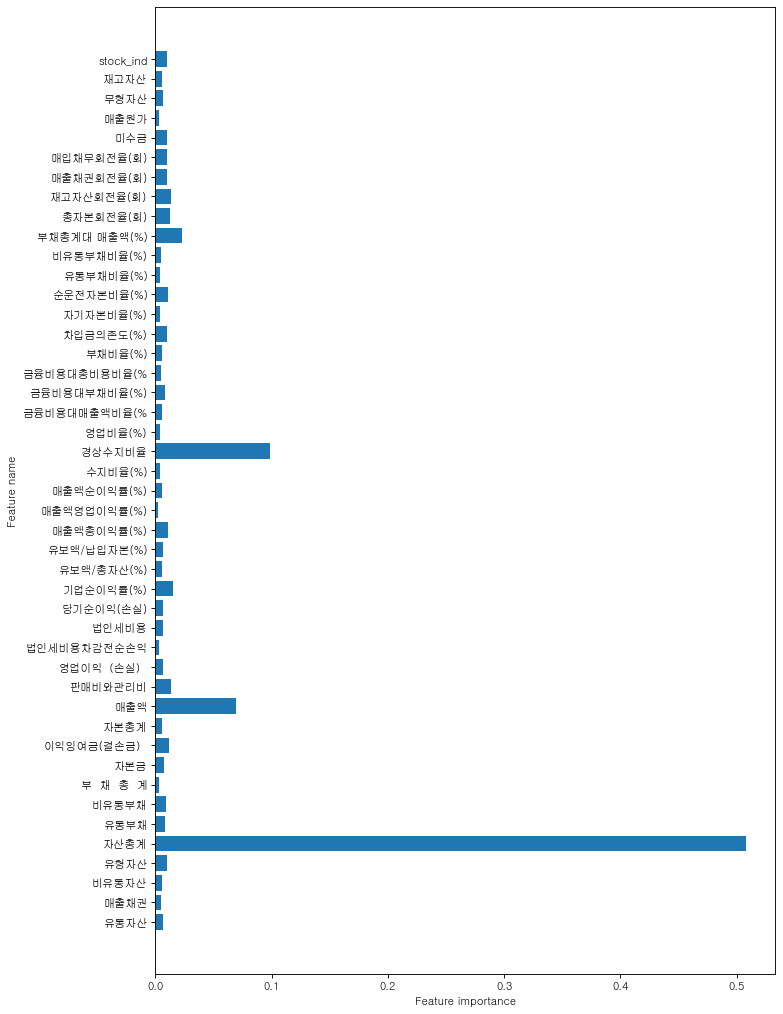

In [110]:
# 의사결정나무 모델
dtc_stock = DecisionTreeClassifier(random_state=2022).fit(X_train, y_train)
print( '의사결정 나무 모델 정확도 : ', dtc_stock.score(X_test, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc_stock.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

랜덤포레스트 정확도  :  0.9457261410788381


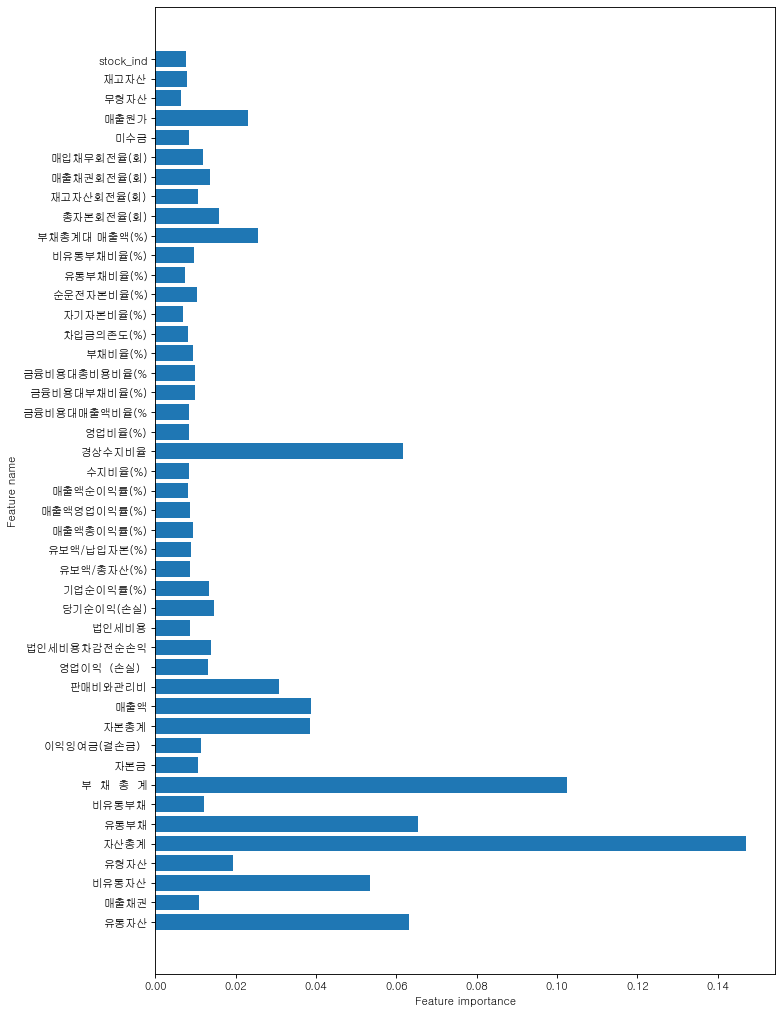

In [111]:
# 랜덤포레스트
rfc = RandomForestClassifier(random_state=2022).fit(X_train, y_train)
print('랜덤포레스트 정확도  : ' ,rfc.score(X_test, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()